In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
company = pd.read_parquet('/home/group3/group3/Finalized/data/company_overview_cleaned.parquet')
glassd_classification = pd.read_parquet('/home/group3/group3/Finalized/data/glassd_classification_cleaned.parquet')
text = pd.read_parquet('/home/group3/glassdoor/glassd_review_internal_data_2024-03-19.parquet')
stock_monthly = pd.read_csv('/home/group3/group3/Finalized/data/stock_monthly.csv')
stock_monthly['date'] = pd.to_datetime(stock_monthly['date'])
rolling_ret = pd.read_csv('/home/group3/group3/Finalized/data/rolling_future_ret.csv')
rolling_ret['date'] = pd.to_datetime(rolling_ret['date'])
rolling_ratings = pd.read_csv('/home/group3/group3/Finalized/data/rolling_period_ratings_stats.csv')
rolling_ratings['reviewDateTime'] = pd.to_datetime(rolling_ratings['reviewDateTime'])
rolling_ret_rating = pd.merge(rolling_ratings,rolling_ret, left_on=['ticker','reviewDateTime'], right_on=['ticker','date'])

In [3]:
ret_filters = stock_monthly['ticker'].unique()
glassd_classification = glassd_classification[glassd_classification['ticker'].isin(ret_filters)]
print(glassd_classification.shape)
(glassd_classification == 0).sum()

(3503784, 20)


reviewId                               0
glassdoorId                            0
reviewDateTime                         0
isCurrentJob                     1471135
lengthOfEmployment               1404271
jobtitle_ref                           0
location_ref                           0
ratingOverall                          0
ratingCareerOpportunities         667759
ratingCompensationAndBenefits     676307
ratingCultureAndValues            810225
ratingSeniorLeadership            712216
ratingWorkLifeBalance             684807
ratingDiversityAndInclusion      2171646
ratingBusinessOutlook                  0
ratingCeo                              0
ratingRecommendToFriend                0
countHelpful                     2740122
countNotHelpful                  3458143
ticker                                 0
dtype: int64

In [4]:
glassd_classification['reviewDateTime']=pd.to_datetime(glassd_classification['reviewDateTime'])
glassd_classification.set_index('reviewDateTime',inplace=True,drop=True)

# Review Counts

In [5]:
monthly_review_count = glassd_classification[['reviewId','ticker']].groupby('ticker').resample('M').count()
avg_monthly_review_count = monthly_review_count['reviewId'].reset_index()[['ticker','reviewId']].groupby('ticker').mean()
avg_monthly_review_count = avg_monthly_review_count.sort_values('reviewId')
month_g1 = avg_monthly_review_count[avg_monthly_review_count['reviewId']>1]
month_g10 = avg_monthly_review_count[avg_monthly_review_count['reviewId']>10]

quarterly_review_count = glassd_classification[['reviewId','ticker']].groupby('ticker').resample('Q').count()
avg_quarterly_review_count = quarterly_review_count['reviewId'].reset_index()[['ticker','reviewId']].groupby('ticker').mean()
avg_quarterly_review_count = avg_quarterly_review_count.sort_values('reviewId')

quarter_g1 = avg_quarterly_review_count[avg_quarterly_review_count['reviewId']>1]
quarter_g10 = avg_quarterly_review_count[avg_quarterly_review_count['reviewId']>10]
quarter_g100 = avg_quarterly_review_count[avg_quarterly_review_count['reviewId']>100]

/tmp/ipykernel_3068277/3514701646.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_review_count = glassd_classification[['reviewId','ticker']].groupby('ticker').resample('M').count()


# Group Portfolio by company

### Compute dataframe

In [29]:
# glassd_classification['Helpfulness'] = glassd_classification['countHelpful'] - glassd_classification['countNotHelpful']

In [30]:
# yearly_helpfulness = glassd_classification[['ticker','Helpfulness']].groupby('ticker').resample('Y').mean().reset_index()

/tmp/ipykernel_2644867/2377346022.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_helpfulness = glassd_classification[['ticker','Helpfulness']].groupby('ticker').resample('Y').mean().reset_index()


In [31]:
# yearly_helpfulness['year'] = yearly_helpfulness['reviewDateTime'].apply(lambda x: x.year)

In [32]:
# yearly_helpfulness.rename(columns={'Helpfulness': 'yearavg_helpfulness'},inplace=True)
# glassd_classification['year'] = glassd_classification.index.year
# glassd_classification['reviewdate'] = glassd_classification.index
# glassd_classification = pd.merge(glassd_classification, yearly_helpfulness[['year','yearavg_helpfulness','ticker']], on=['ticker', 'year'])
# glassd_classification.index = glassd_classification['reviewdate']

In [41]:
# month_g1_rating = glassd_classification[glassd_classification['ticker'].isin(month_g1.index)]

In [42]:
# ratings_cols = glassd_classification.filter(like='rating').columns
# numeric_ratings_col = ratings_cols.values[:-3]

In [68]:
# ratings_avg = pd.DataFrame()
# for col in numeric_ratings_col:
#     col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').apply(lambda x: x.loc[x[col]!= 0, col].mean())
#     col_avg.name = col
#     col_avg = col_avg.reset_index()
#     ratings_avg = pd.concat([ratings_avg, col_avg[[col]]],axis=1).reset_index(drop=True)

/tmp/ipykernel_2644867/3318824442.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').apply(lambda x: x.loc[x[col]!= 0, col].mean())
/tmp/ipykernel_2644867/3318824442.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').apply(lambda x: x.loc[x[col]!= 0, col].mean())
/tmp/ipykernel_2644867/3318824442.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').apply(lambda x: x.loc[x[col]!= 0, col].mean())
/tmp/ipykernel_2644867/3318824442.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby

In [80]:
# ratings_avg2 = pd.concat([ratings_avg,col_avg[['ticker','reviewdate']]], axis=1)
# monthly_ret_rating = pd.merge(ratings_avg2, stock_monthly, left_on=['ticker','reviewdate'], right_on=['ticker','date'])
# monthly_ret_rating.to_csv('monthly_rating_ret.csv')

In [14]:
# ratings_avg = pd.read_csv('/home/group3/group3/Finalized/data/monthly_rating_ret.csv',index_col=0)

### Compute dataframe with different lookback period, not just a month

In [99]:
# ratings_cols = glassd_classification.filter(like='rating').columns
# numeric_ratings_col = ratings_cols.values[:-3]
# ratings_avg = pd.DataFrame()
# for col in numeric_ratings_col:
#     col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').agg(
#                     total=(col, lambda x: x[x!=0].sum()),
#                     count=(col, lambda x: x[x!=0].count())
#     )
#     col_avg = col_avg.reset_index()
#     col_avg.rename(columns={'total': col+'_total', 'count': col+'_count'},inplace=True)
#     ratings_avg = pd.concat([ratings_avg, col_avg[[col+'_total', col+'_count']]],axis=1).reset_index(drop=True)

/tmp/ipykernel_2650216/2444861693.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').agg(
/tmp/ipykernel_2650216/2444861693.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').agg(
/tmp/ipykernel_2650216/2444861693.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').agg(
/tmp/ipykernel_2650216/2444861693.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col_avg = glassd_classification[['ticker',col]].groupby('ticker').resample('M').agg(
/tmp/ipykernel_2650216/2444861693.py:5: FutureWarning: 'M' is deprecated and will be removed in 

In [15]:
# ratings_stat = pd.concat([col_avg[['ticker','reviewDateTime']], ratings_avg],axis=1)

# ratings_stat['reviewDateTime']=pd.to_datetime(ratings_stat['reviewDateTime'])
# ratings_stat.set_index('reviewDateTime',drop=True,inplace=True)

In [32]:
# rolling = ratings_stat.groupby('ticker').rolling(window=3).sum()
# # rolling.drop('ticker',inplace=True)
# rolling=rolling.add_prefix(f"{3}_")
# rolling = rolling.reset_index()

In [36]:
# rolling_df = pd.DataFrame()
# rolling_periods = [1,3,6,9,12]
# for i in rolling_periods:
#     rolling = ratings_stat.groupby('ticker').rolling(window=i).sum()
#     rolling = rolling.add_prefix(f"{i}_")
#     rolling = rolling.reset_index()
#     rolling_df = pd.concat([rolling_df,rolling.drop(['ticker','reviewDateTime'],axis=1)],axis=1)

# rolling_df = pd.concat([rolling[['ticker','reviewDateTime']],rolling_df],axis=1)

In [46]:
# for i in rolling_periods:
#     for col in numeric_ratings_col:
#         rolling_df[f"{i}_{col}_mean"] = rolling_df[f"{i}_{col}_total"]/rolling_df[f"{i}_{col}_count"]


In [48]:
# rolling_df.to_csv('rolling_period_ratings_stats.csv',index=False)

In [49]:
rolling_df = pd.read_csv('/home/group3/group3/Finalized/data/rolling_period_ratings_stats.csv')

### Plain monthly ratings analysis

In [7]:
monthly_rating_ret = pd.read_csv('/home/group3/group3/Finalized/data/monthly_rating_ret.csv',index_col=0)

In [20]:
monthly_rating_ret['ret']  = monthly_rating_ret['ret']-1

In [22]:
overall_rating = monthly_rating_ret[['ratingOverall','reviewdate','ticker','ret']]

In [27]:
q100_ratingoverall = overall_rating[overall_rating['ticker'].isin(quarter_g100.index)]

In [36]:
month_rating_diff = q100_ratingoverall.groupby('ticker').apply(lambda x: x['ratingOverall'] - x['ratingOverall'].shift(1)).reset_index()['ratingOverall']

/tmp/ipykernel_2650216/2473432225.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  month_rating_diff = q100_ratingoverall.groupby('ticker').apply(lambda x: x['ratingOverall'] - x['ratingOverall'].shift(1)).reset_index()['ratingOverall']


In [41]:
q100_ratingoverall.reset_index(drop=True,inplace=True)

In [42]:
q100_ratingoverall['month_rating_diff'] = month_rating_diff
q100_ratingoverall['ret_next_month'] = q100_ratingoverall.groupby('ticker').apply(lambda x: x['ret'].shift(-1)).reset_index()['ret']

/tmp/ipykernel_2650216/993465309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q100_ratingoverall['month_rating_diff'] = month_rating_diff


In [50]:
q100_ratingoverall

,ratingOverall,reviewdate,ticker,ret,month_rating_diff,ret_next_month
0,3.187500,2013-12-31,AAL,0.026424,NaN,0.328717
1,2.928571,2014-01-31,AAL,0.328717,-0.258929,0.100746
2,2.947368,2014-02-28,AAL,0.100746,0.018797,-0.008938
3,3.391304,2014-03-31,AAL,-0.008938,0.443936,-0.041803
4,3.300000,2014-04-30,AAL,-0.041803,-0.091304,0.145137
...,...,...,...,...,...,...
19522,3.478261,2022-08-31,XRX,-0.029772,0.641052,-0.198347
19523,3.300000,2022-09-30,XRX,-0.198347,-0.178261,0.118502
19524,2.972222,2022-10-31,XRX,0.118502,-0.327778,0.114835
19525,3.142857,2022-11-30,XRX,0.114835,0.170635,-0.089400


In [57]:
q100_ratingoverall.drop(q100_ratingoverall[q100_ratingoverall['ret_next_month']>15].index,inplace=True)

/tmp/ipykernel_2650216/1688993577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q100_ratingoverall.drop(q100_ratingoverall[q100_ratingoverall['ret_next_month']>15].index,inplace=True)


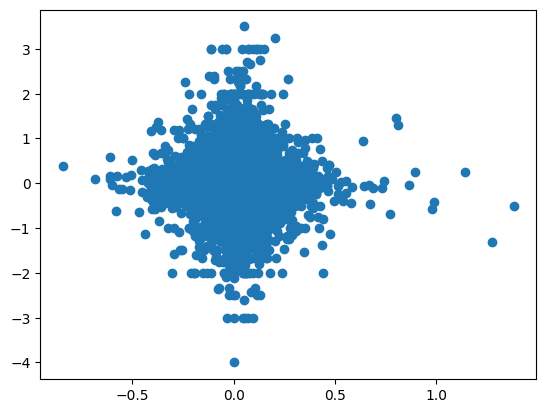

In [58]:
plt.scatter(q100_ratingoverall['ret_next_month'],q100_ratingoverall['month_rating_diff'])

In [65]:
monthly_diversity = monthly_rating_ret[['ticker','reviewdate','ratingCultureAndValues', 'mcap','ret']]

In [69]:
monthly_diversity = monthly_diversity.dropna().reset_index(drop=True)

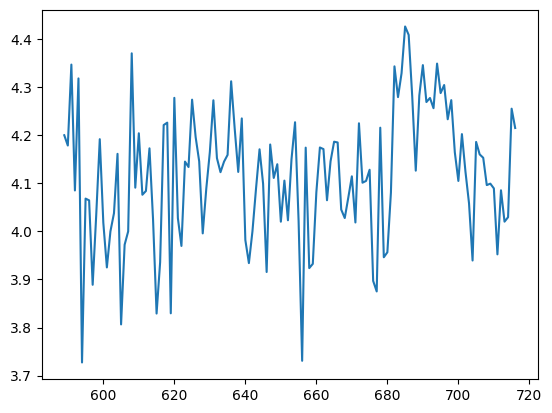

In [72]:
plt.plot(monthly_diversity[monthly_diversity['ticker']=='AAPL']['ratingCultureAndValues'])

In [76]:
monthly_diversity[monthly_diversity['ticker']=='AAPL'][['ret','ratingCultureAndValues']].corr()

,ret,ratingCultureAndValues
ret,1.000000,0.009108
ratingCultureAndValues,0.009108,1.000000


In [77]:
monthly_diversity[['ret','ratingCultureAndValues']].corr()

,ret,ratingCultureAndValues
ret,1.000000,0.006041
ratingCultureAndValues,0.006041,1.000000


In [78]:
monthly_diversity

,ticker,reviewdate,ratingCultureAndValues,mcap,ret
0,A,2012-05-31,3.500000,1.413443e+10,-0.036037
1,A,2012-06-30,3.700000,1.363594e+10,-0.032466
2,A,2012-07-31,4.357143,1.330581e+10,-0.024211
3,A,2012-08-31,4.857143,1.291314e+10,-0.029512
4,A,2012-09-30,3.454545,1.339763e+10,0.037405
...,...,...,...,...,...
144052,ZYXI,2022-08-31,4.588235,3.433586e+08,0.041958
144053,ZYXI,2022-09-30,4.818182,3.398257e+08,0.014541
144054,ZYXI,2022-10-31,4.400000,4.269642e+08,0.256893
144055,ZYXI,2022-11-30,4.959184,5.138552e+08,0.203510


### Correlation on different rolling periods

In [44]:
rolling_df = pd.read_csv('/home/group3/group3/Finalized/data/rolling_period_ratings_stats.csv')
rolling_df['reviewDateTime'] = pd.to_datetime(rolling_df['reviewDateTime'])

In [45]:
rolling_ret_rating = pd.merge(rolling_df,rolling_ret, left_on=['ticker','reviewDateTime'], right_on=['ticker','date'])

In [25]:
ratings_cols = glassd_classification.filter(like='rating').columns
numeric_ratings_col = ratings_cols.values[:-3]
rolling_periods = [1,3,6,9,12]
def get_return_correlation(x):
    stat_df = pd.DataFrame()
    for i in rolling_periods:
        for col in numeric_ratings_col:
            stat_df[f'{i}_{col}_retcorr'] = [x[f'{i}_{col}_mean'].corr(x['ret'])]
    return stat_df

In [ ]:
ret_corr_df = rolling_ret_rating.groupby('ticker').apply(lambda x: get_return_correlation(x))

In [ ]:
ret_corr_df_2023 = rolling_ret_rating[(rolling_ret_rating['reviewDateTime']>'2020-01-01') & (rolling_ret_rating['reviewDateTime']<'2023-12-30')].groupby('ticker').apply(lambda x: get_return_correlation(x))

In [14]:
ret_corr_df = ret_corr_df.reset_index()
ret_corr_df.drop('level_1',axis=1,inplace=True)

ret_corr_df_2023 = ret_corr_df_2023.reset_index()
ret_corr_df_2023.drop('level_1',axis=1,inplace=True)

In [15]:
ret_corr_df = ret_corr_df[ret_corr_df['ticker'].isin(stock_monthly['ticker'].unique())]
ret_corr_df_2023 = ret_corr_df_2023[ret_corr_df_2023['ticker'].isin(stock_monthly['ticker'].unique())]

In [26]:
ret_corr_month_g1 = ret_corr_df_2023[ret_corr_df_2023['ticker'].isin(month_g1.index)]
ret_corr_month_g10 = ret_corr_df_2023[ret_corr_df_2023['ticker'].isin(month_g10.index)]
ret_corr_quarter_g1 = ret_corr_df_2023[ret_corr_df_2023['ticker'].isin(quarter_g1.index)]
ret_corr_quarter_g10 = ret_corr_df_2023[ret_corr_df_2023['ticker'].isin(quarter_g10.index)]
ret_corr_quarter_g100 = ret_corr_df_2023[ret_corr_df_2023['ticker'].isin(quarter_g100.index)]

ret_corr_quarter_g100.set_index(ret_corr_quarter_g100['ticker'],inplace=True,drop=True)
# ret_corr_quarter_g100.drop('index',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x7f3dc09cd9c0>,
 [Text(0, 0, '12_ratingCareerOpportunities_retcorr'),
  Text(34, 0, '1_ratingOverall_retcorr')])

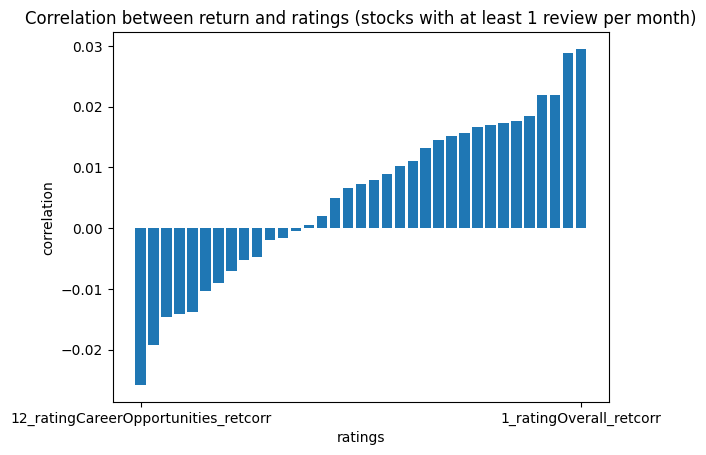

In [37]:
cor_g1_2023 = ret_corr_month_g1.drop('ticker',axis=1).mean().sort_values()
plt.bar(x=cor_g1_2023.index, height=cor_g1_2023.values)
plt.title('Correlation between return and ratings (stocks with at least 1 review per month)')
plt.xlabel('ratings')
plt.ylabel('correlation')
plt.xticks([0, len(cor_g1_2023)-1], [cor_g1_2023.index[0], cor_g1_2023.index[-1]])

([<matplotlib.axis.XTick at 0x7f4096a078b0>,
 [Text(0, 0, '3_ratingDiversityAndInclusion_retcorr'),
  Text(34, 0, '1_ratingOverall_retcorr')])

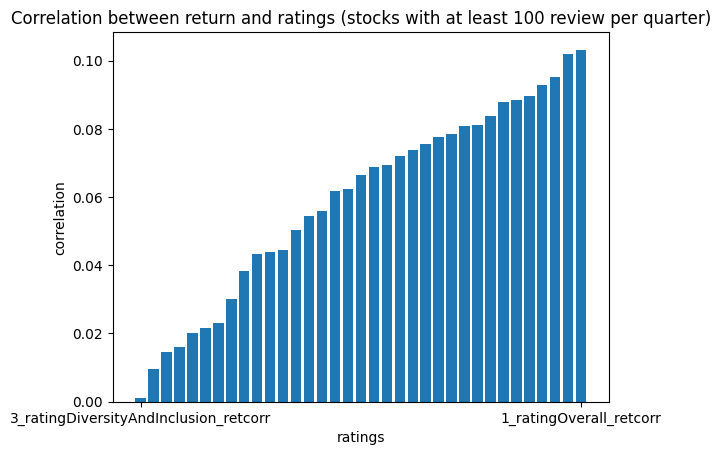

In [38]:
cor_g100_2023 = ret_corr_quarter_g100.drop('ticker',axis=1).mean().sort_values()
plt.bar(x=cor_g100_2023.index, height=cor_g100_2023.values)
plt.title('Correlation between return and ratings (stocks with at least 100 review per quarter)')
plt.xlabel('ratings')
plt.ylabel('correlation')
plt.xticks([0, len(cor_g100_2023)-1], [cor_g100_2023.index[0], cor_g100_2023.index[-1]])

### Analyze which forward looking period is the best

In [70]:
ratings_cols = glassd_classification.filter(like='rating').columns
numeric_ratings_col = ratings_cols.values[:-3]
rolling_periods = [1,3,6,9,12,18,24]
def get_return_correlation_forwardret(x):
    stat_df = pd.DataFrame()
    for i in rolling_periods:
        # for col in numeric_ratings_col:
        stat_df[f'{i}M_ret'] = [x[f'12_ratingOverall_mean'].corr(x[f'{i}M_ret'])]
    return stat_df

In [ ]:
ret_corr_forwardret_df_2023 = rolling_ret_rating[(rolling_ret_rating['reviewDateTime']>'2020-01-01') & (rolling_ret_rating['reviewDateTime']<'2023-12-30')].groupby('ticker').apply(lambda x: get_return_correlation_forwardret(x))

In [72]:
ret_corr_forwardret_df_2023 = ret_corr_forwardret_df_2023.reset_index()
ret_corr_forwardret_df_2023.drop('level_1',axis=1,inplace=True)
ret_corr_forwardret_df_2023 = ret_corr_forwardret_df_2023[ret_corr_forwardret_df_2023['ticker'].isin(stock_monthly['ticker'].unique())]

In [73]:
ret_corr_month_g1_forwardret = ret_corr_forwardret_df_2023[ret_corr_forwardret_df_2023['ticker'].isin(month_g1.index)]
ret_corr_month_g10_forwardret = ret_corr_forwardret_df_2023[ret_corr_forwardret_df_2023['ticker'].isin(month_g10.index)]
ret_corr_quarter_g1_forwardret = ret_corr_forwardret_df_2023[ret_corr_forwardret_df_2023['ticker'].isin(quarter_g1.index)]
ret_corr_quarter_g10_forwardret = ret_corr_forwardret_df_2023[ret_corr_forwardret_df_2023['ticker'].isin(quarter_g10.index)]
ret_corr_quarter_g100_forwardret = ret_corr_forwardret_df_2023[ret_corr_forwardret_df_2023['ticker'].isin(quarter_g100.index)]

ret_corr_quarter_g100_forwardret.set_index(ret_corr_quarter_g100_forwardret['ticker'],inplace=True,drop=True)
# ret_corr_quarter_g100.drop('index',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x7f3dc099a140>,
 [Text(0, 0, '18M_ret'), Text(6, 0, '1M_ret')])

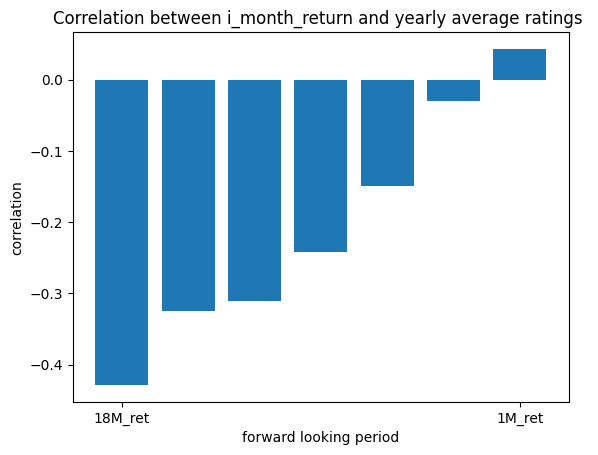

In [75]:
cor_g100_2023_forwardret = ret_corr_quarter_g100_forwardret.drop('ticker',axis=1).mean().sort_values()
plt.bar(x=cor_g100_2023_forwardret.index, height=cor_g100_2023_forwardret.values)
plt.title('Correlation between i_month_return and yearly average ratings ')
plt.xlabel('forward looking period')
plt.ylabel('correlation')
plt.xticks([0, len(cor_g100_2023_forwardret)-1], [cor_g100_2023_forwardret.index[0], cor_g100_2023_forwardret.index[-1]])

# Grouping portfolio by rating

In [15]:
rolling_ret_rating = pd.merge(rolling_ret_rating, company[['ticker','industryName']], on='ticker')

In [19]:
rolling_ret_rating_20 = rolling_ret_rating[rolling_ret_rating['reviewDateTime']>'2020-01-01']

In [23]:
overall_group = rolling_ret_rating_20[['ticker','reviewDateTime','1_ratingOverall_mean']].groupby('reviewDateTime').apply(lambda x: pd.qcut(x['1_ratingOverall_mean'], q=5, labels=['1','2','3','4','5']))

/tmp/ipykernel_3068277/3376523446.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overall_group = rolling_ret_rating_20[['ticker','reviewDateTime','1_ratingOverall_mean']].groupby('reviewDateTime').apply(lambda x: pd.qcut(x['1_ratingOverall_mean'], q=5, labels=['1','2','3','4','5']))


In [30]:
overall_group = overall_group.reset_index()

In [26]:
rolling_ret_rating_20['index_'] = rolling_ret_rating_20.index

/tmp/ipykernel_3068277/4108337353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_ret_rating_20['index_'] = rolling_ret_rating_20.index


In [31]:
rolling_ret_rating_20_grouping = pd.merge(rolling_ret_rating_20, overall_group[['level_1','1_ratingOverall_mean']], left_on='index_', right_on='level_1')

In [41]:
ret_cols = list(rolling_ret_rating_20_grouping.filter(like='_ret').columns)

In [42]:
rolling_ret_rating_20_grouping[['1_ratingOverall_mean_y']+ret_cols].groupby('1_ratingOverall_mean_y').mean()

/tmp/ipykernel_3068277/23535793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rolling_ret_rating_20_grouping[['1_ratingOverall_mean_y']+ret_cols].groupby('1_ratingOverall_mean_y').mean()


,1M_ret,3M_ret,6M_ret,9M_ret,12M_ret,18M_ret,24M_ret
1_ratingOverall_mean_y,,,,,,,
1,1.011267,1.054775,1.123586,1.195535,1.271243,1.397265,1.529437
2,1.007967,1.040942,1.096649,1.167649,1.257323,1.368101,1.470516
3,1.013998,1.055929,1.116266,1.193628,1.284355,1.371845,1.461468
4,1.007652,1.037445,1.087526,1.141383,1.216296,1.326843,1.431757
5,1.007082,1.034486,1.074852,1.124880,1.183615,1.264397,1.344483


In [44]:
rolling_ret_rating_20_grouping[rolling_ret_rating_20_grouping['ticker'].isin(quarter_g100.index)][['1_ratingOverall_mean_y']+ret_cols].groupby('1_ratingOverall_mean_y').mean()

/tmp/ipykernel_3068277/3701069056.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rolling_ret_rating_20_grouping[rolling_ret_rating_20_grouping['ticker'].isin(quarter_g100.index)][['1_ratingOverall_mean_y']+ret_cols].groupby('1_ratingOverall_mean_y').mean()


,1M_ret,3M_ret,6M_ret,9M_ret,12M_ret,18M_ret,24M_ret
1_ratingOverall_mean_y,,,,,,,
1,1.115847,1.354909,2.173569,2.631916,3.187620,4.110664,5.151783
2,1.007247,1.013300,1.044906,1.162612,1.342061,1.431866,1.675628
3,1.007982,1.065105,1.131782,1.213589,1.340957,1.380151,1.354231
4,1.013109,1.048881,1.101975,1.174636,1.239834,1.335311,1.355127
5,1.005658,1.027522,1.077137,1.123395,1.177661,1.296651,1.317204


In [ ]:
rolling_ret_rating_20_grouping['']

In [50]:
rolling_ret_rating_20_grouping[rolling_ret_rating_20_grouping['reviewDateTime']=='2020-01-31'][['1_ratingOverall_mean_x','1_ratingOverall_mean_y']]

,1_ratingOverall_mean_x,1_ratingOverall_mean_y
0,4.428571,5
36,4.000000,4
72,3.947368,4
108,NaN,NaN
144,NaN,NaN
...,...,...
90846,4.666667,5
90911,4.375000,5
90947,4.333333,5
90983,4.142857,5
